In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [169]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

## Understanding the Dataset

In [170]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [171]:
df.shape

(4340, 8)

In [172]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [173]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [174]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [175]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


# Encoding the data

In [176]:
df['brand'] = df['name'].str.split().str[0]
df = df.drop(columns=['name'])
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [177]:
Df = pd.get_dummies(df, columns=['fuel', 'seller_type','transmission' ], drop_first=True)

In [178]:
column_to_encode = ['brand','owner']
le = LabelEncoder()
for column in column_to_encode:
    Df[column] = le.fit_transform(Df[column])

In [179]:
Df.head()

,year,selling_price,km_driven,owner,brand,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2007,60000,70000,0,18,False,False,False,True,True,False,True
1,2007,135000,50000,0,18,False,False,False,True,True,False,True
2,2012,600000,100000,0,10,True,False,False,False,True,False,True
3,2017,250000,46000,0,5,False,False,False,True,True,False,True
4,2014,450000,141000,2,9,True,False,False,False,True,False,True


In [180]:
Df.columns

Index(['year', 'selling_price', 'km_driven', 'owner', 'brand', 'fuel_Diesel',
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual'],
      dtype='object')

## Changing the datatypes to integer

In [181]:
Df = Df.astype('int64')
Df.dtypes

year                            int64
selling_price                   int64
km_driven                       int64
owner                           int64
brand                           int64
fuel_Diesel                     int64
fuel_Electric                   int64
fuel_LPG                        int64
fuel_Petrol                     int64
seller_type_Individual          int64
seller_type_Trustmark Dealer    int64
transmission_Manual             int64
dtype: object

## Dealing with null values and duplicates

In [182]:
Df.isnull().sum()

year                            0
selling_price                   0
km_driven                       0
owner                           0
brand                           0
fuel_Diesel                     0
fuel_Electric                   0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
dtype: int64

### No Null Values

In [183]:
Df.duplicated().sum()

790

In [184]:
Df[Df.duplicated(keep=False)].head(10)


,year,selling_price,km_driven,owner,brand,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2007,60000,70000,0,18,0,0,0,1,1,0,1
1,2007,135000,50000,0,18,0,0,0,1,1,0,1
2,2012,600000,100000,0,10,1,0,0,0,1,0,1
3,2017,250000,46000,0,5,0,0,0,1,1,0,1
4,2014,450000,141000,2,9,1,0,0,0,1,0,1
5,2007,140000,125000,0,18,0,0,0,1,1,0,1
6,2016,550000,25000,0,10,0,0,0,1,1,0,1
7,2014,240000,60000,2,25,0,0,0,1,1,0,1
8,2015,850000,25000,0,10,0,0,0,1,1,0,1
9,2017,365000,78000,0,18,0,0,0,0,1,0,1


In [185]:
Df.shape

(4340, 12)

In [186]:
Df = Df.drop_duplicates(keep='first')

### keeping the first record and deleting the other duplicates

In [187]:
Df.duplicated().sum()

0

In [188]:
Df.shape

(3550, 12)

## Car Brands

In [189]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [190]:
#Most common brands 
df['brand'].value_counts().head(10)

brand
Maruti        1280
Hyundai        821
Mahindra       365
Tata           361
Honda          252
Ford           238
Toyota         206
Chevrolet      188
Renault        146
Volkswagen     107
Name: count, dtype: int64

# Data Visualization

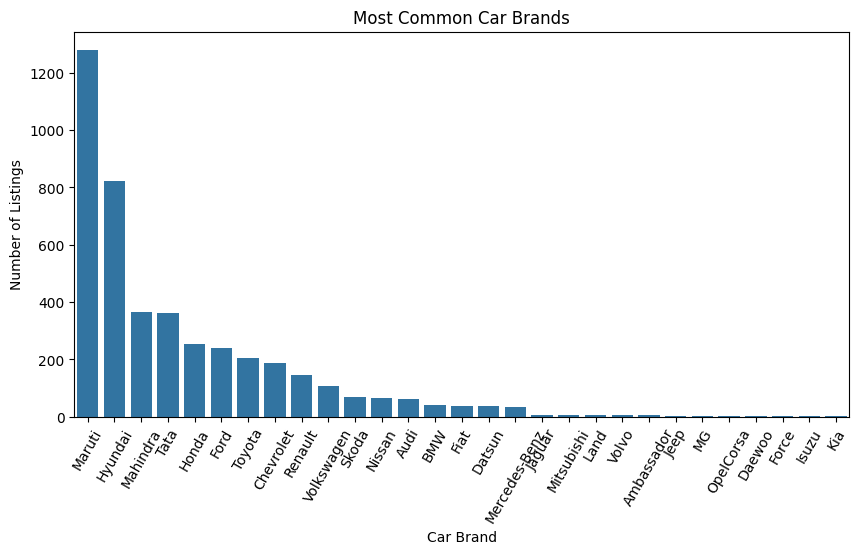

In [191]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['brand'].value_counts().index[:], y=df['brand'].value_counts().values[:])
plt.xticks(rotation=60)
plt.xlabel("Car Brand")
plt.ylabel("Number of Listings")
plt.title("Most Common Car Brands")
plt.show()

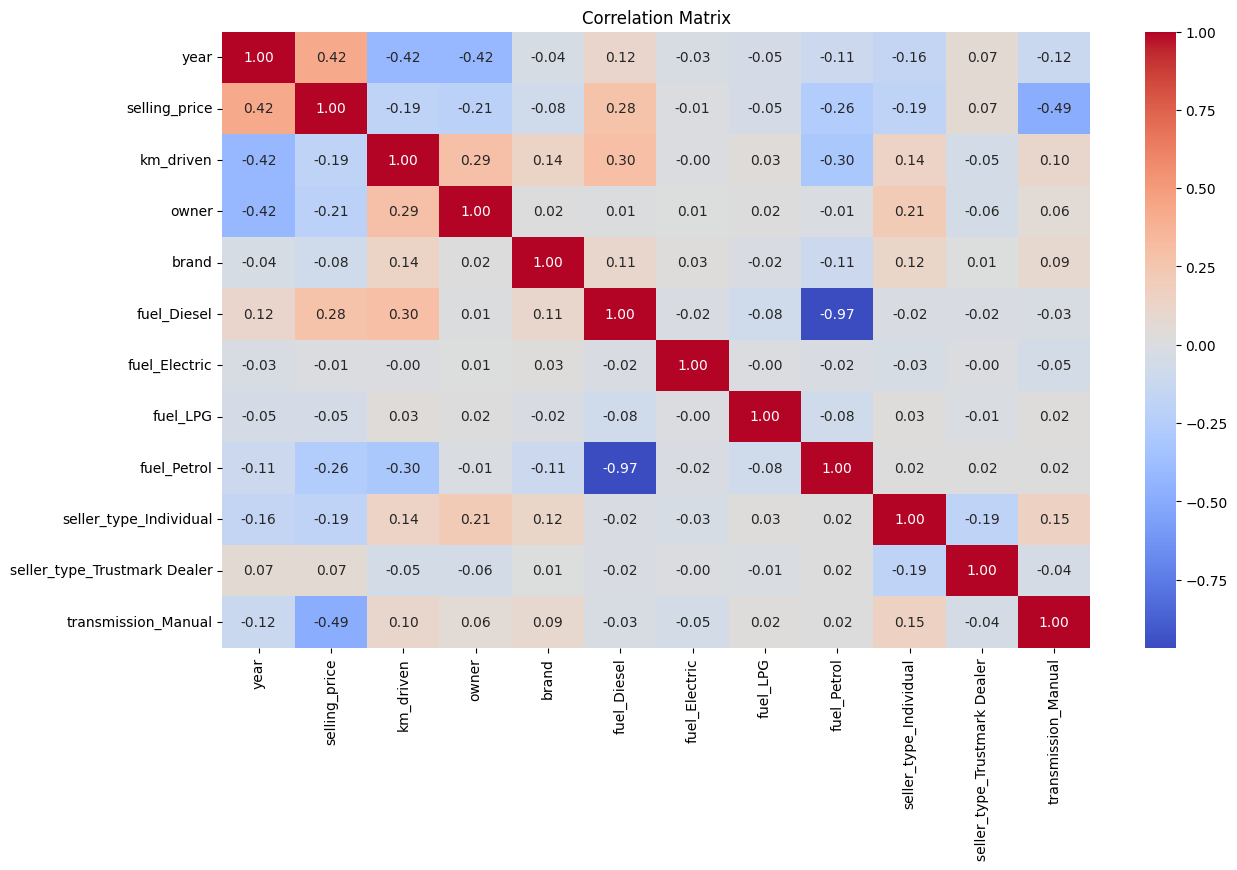

In [192]:
correlation_matrix =Df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [193]:
correlation_with_price = Df.corr()["selling_price"]  # Replace with your target column
print(correlation_with_price.sort_values(ascending=False))


selling_price                   1.000000
year                            0.424248
fuel_Diesel                     0.276022
seller_type_Trustmark Dealer    0.065934
fuel_Electric                  -0.005410
fuel_LPG                       -0.046814
brand                          -0.076292
seller_type_Individual         -0.187272
km_driven                      -0.187840
owner                          -0.213459
fuel_Petrol                    -0.260490
transmission_Manual            -0.486404
Name: selling_price, dtype: float64


Conclusions:- 

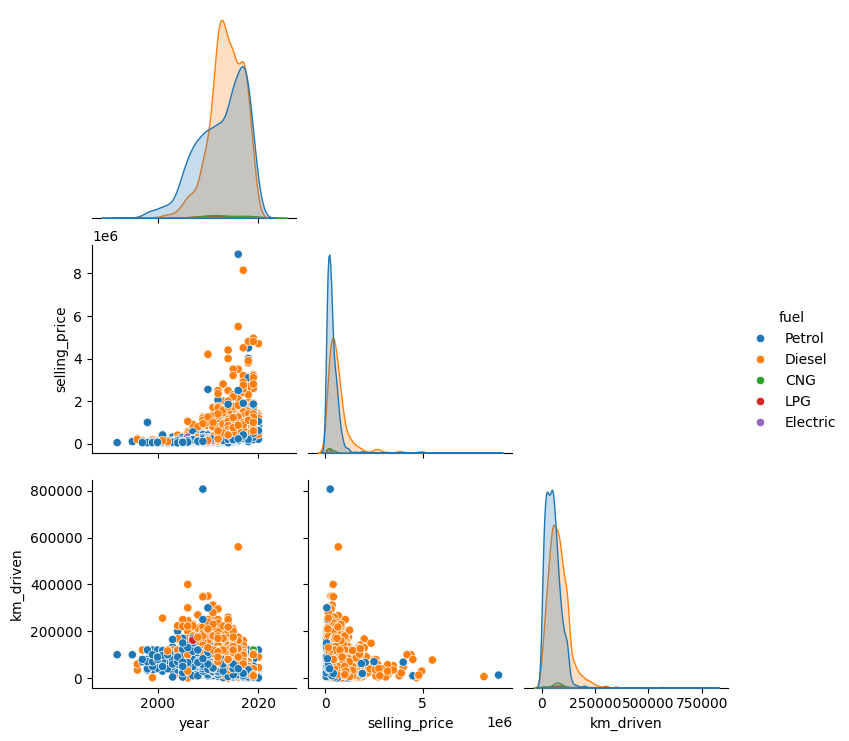

In [194]:
sns.pairplot(df, corner=True , hue = 'fuel')
plt.show()

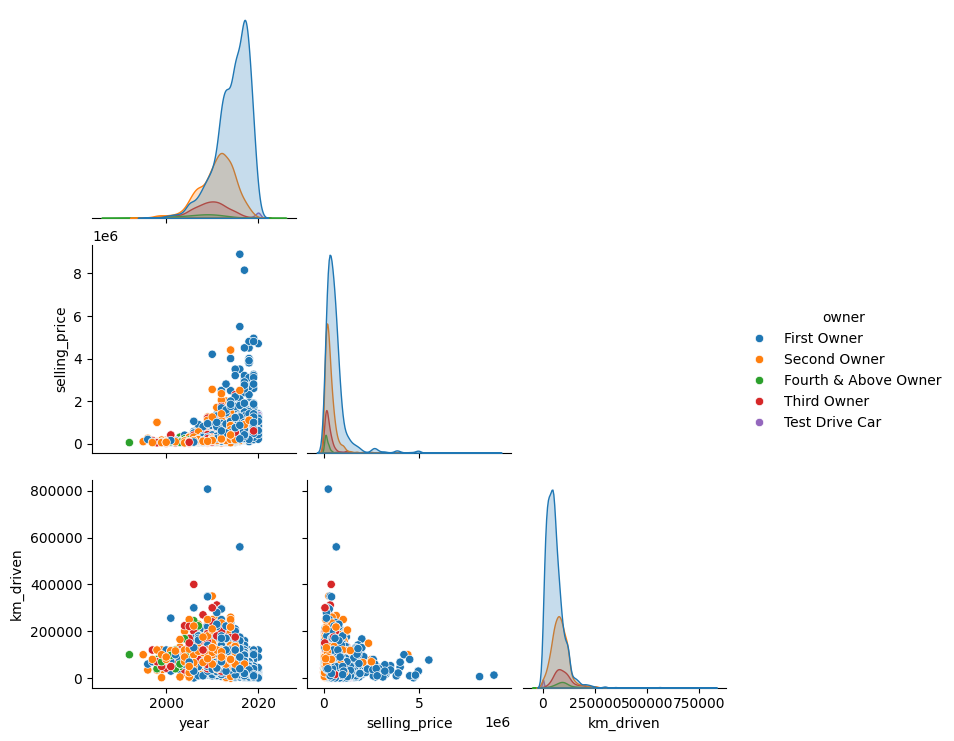

In [195]:
sns.pairplot(df, corner=True , hue = 'owner')
plt.show()

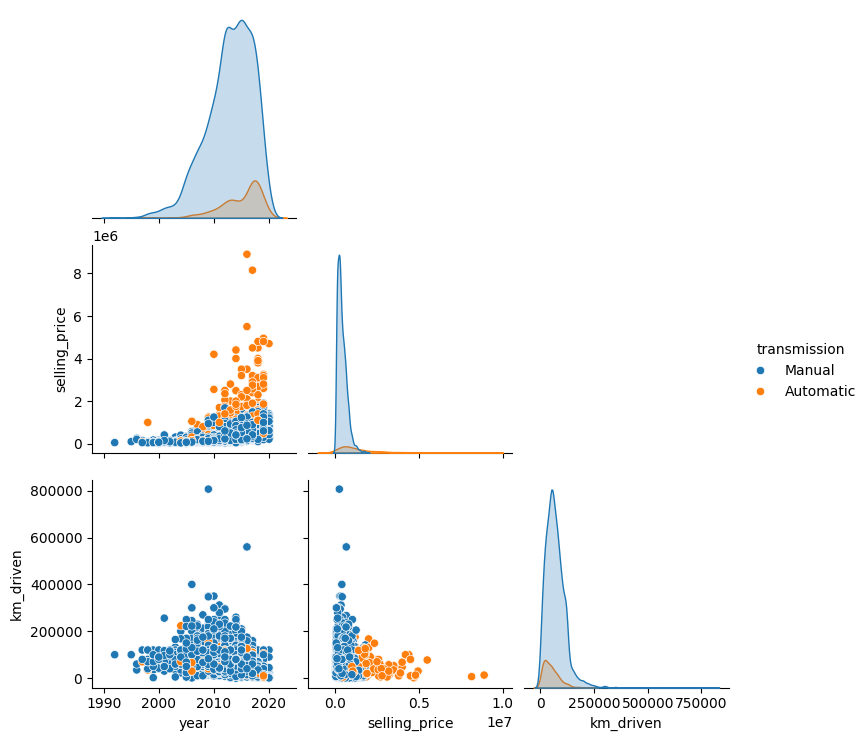

In [196]:
sns.pairplot(df, corner=True , hue = 'transmission')
plt.show()

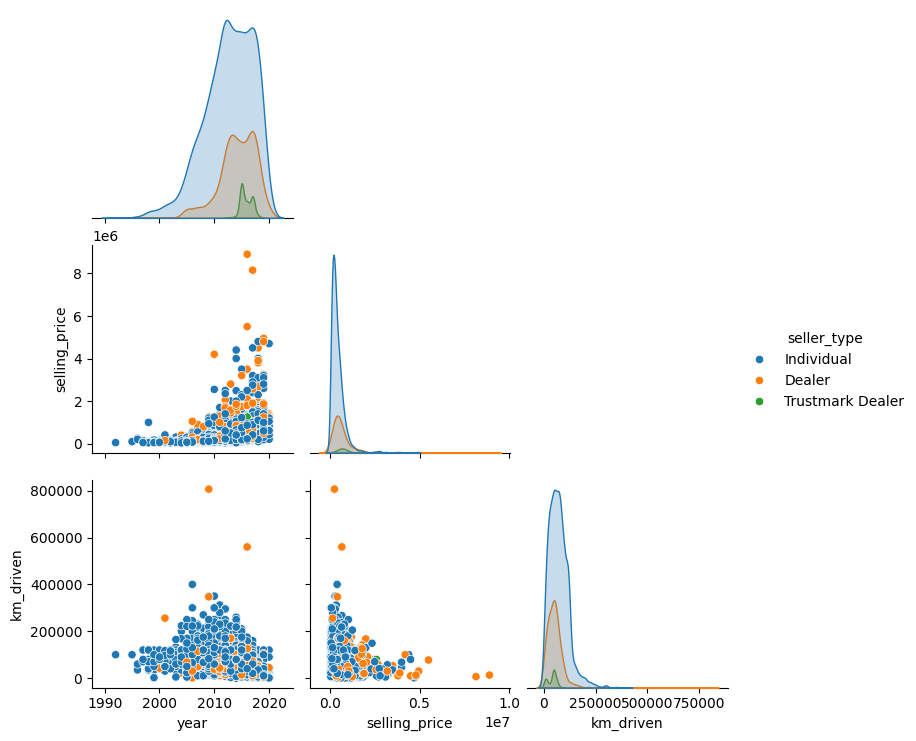

In [197]:
sns.pairplot(df, corner=True , hue = 'seller_type')
plt.show()

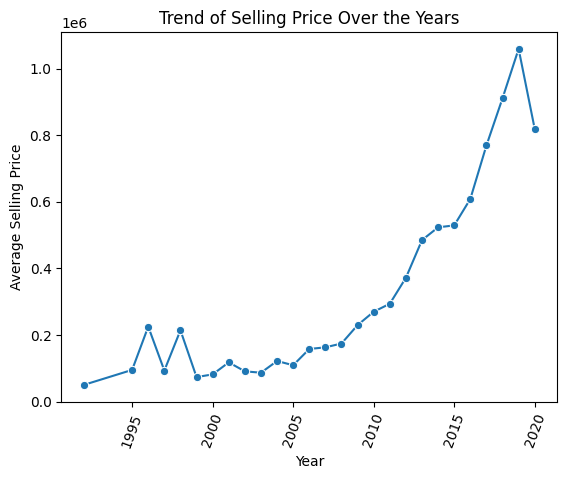

In [214]:
sns.lineplot(x="year", y="selling_price", data=df, marker='o',errorbar=None)
plt.xticks(rotation=70)
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.title("Trend of Selling Price Over the Years")
plt.show()

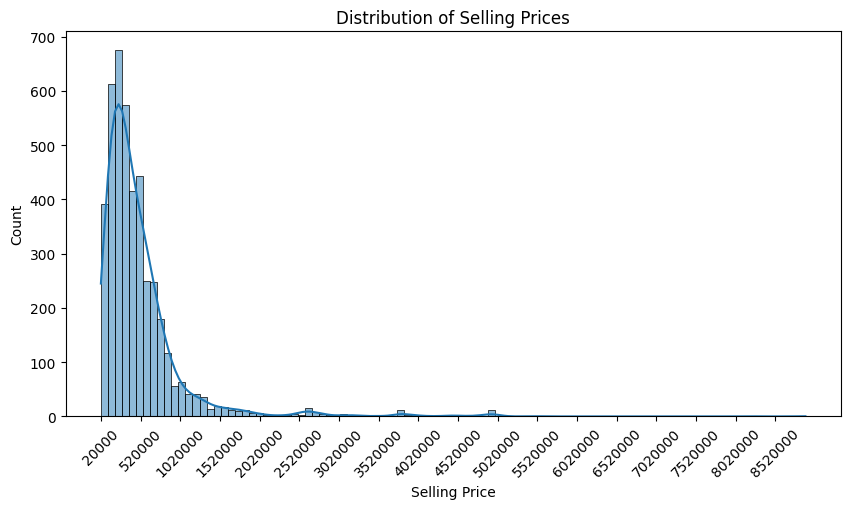

In [204]:
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(df['selling_price'], bins=100, kde=True)

plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.title("Distribution of Selling Prices")

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.ticklabel_format(style='plain', axis='x')  # Ensures actual values show, not scientific notation

# Manually setting x-axis ticks every 5k
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
plt.xticks(np.arange(min_price, max_price, 500000)) 
plt.show()


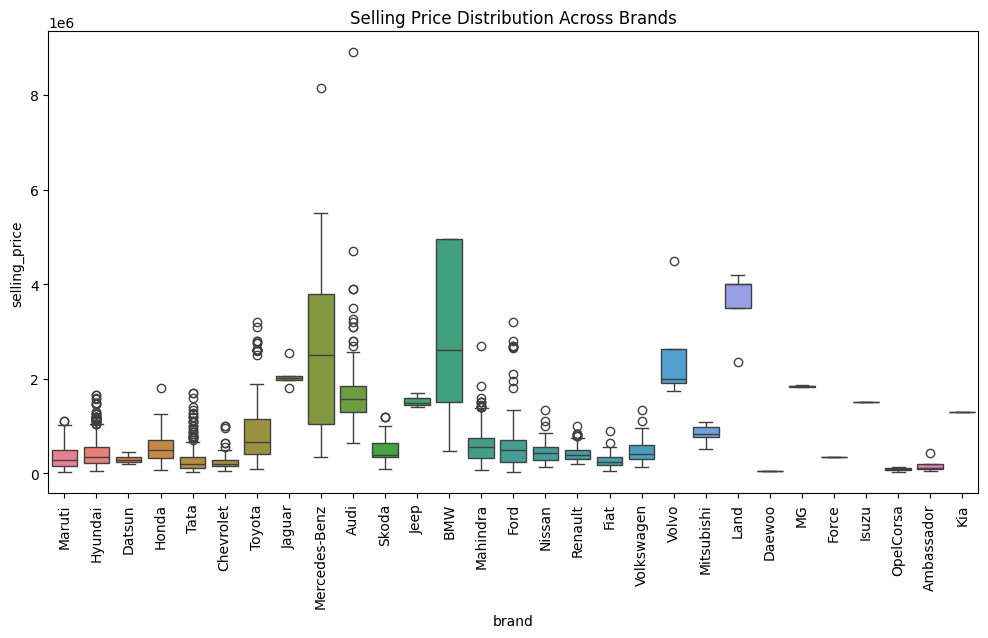

In [206]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='selling_price', data=df, hue='brand')
plt.xticks(rotation=90)
plt.title('Selling Price Distribution Across Brands')
plt.show()


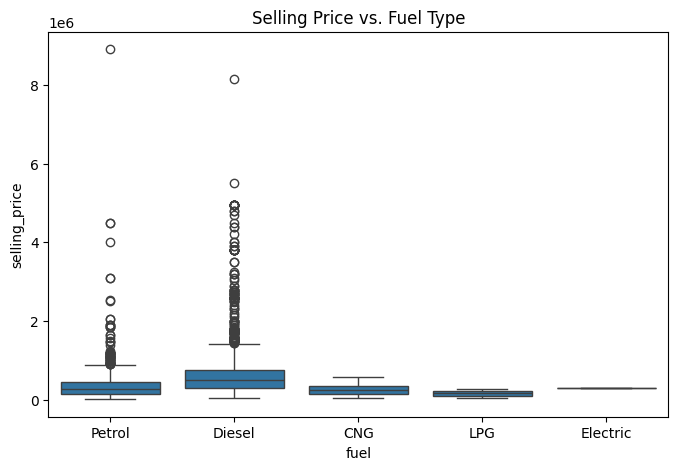

In [207]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price vs. Fuel Type')
plt.show()


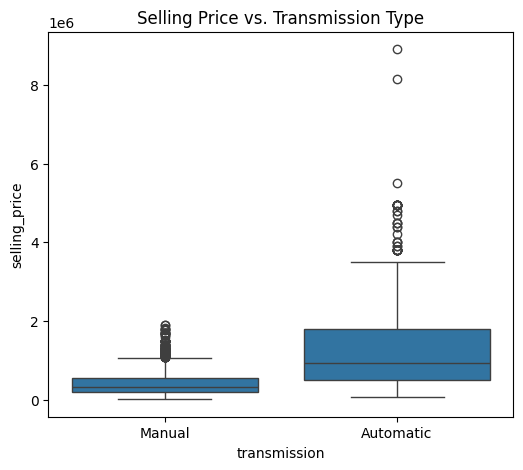

In [208]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Selling Price vs. Transmission Type')
plt.show()


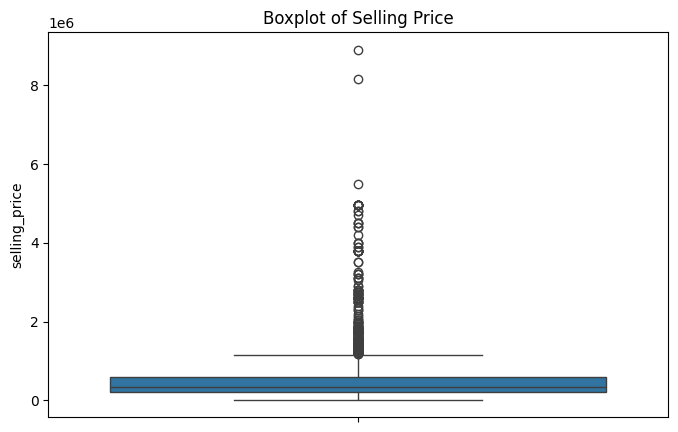

In [209]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

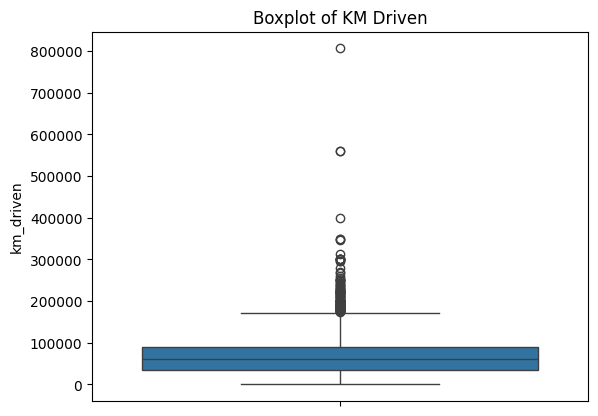

In [210]:
sns.boxplot(y=df['km_driven'])
plt.title('Boxplot of KM Driven')
plt.show()


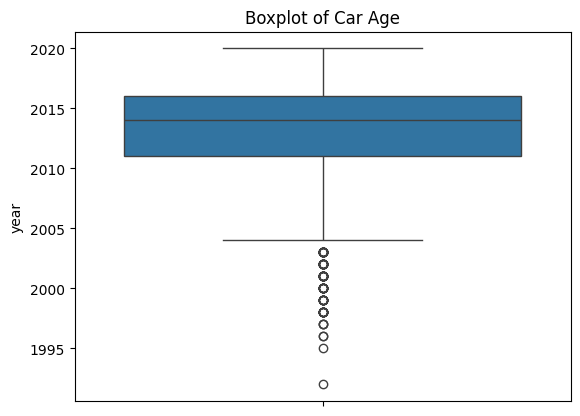

In [211]:
sns.boxplot(y=df['year'])
plt.title('Boxplot of Car Age')
plt.show()


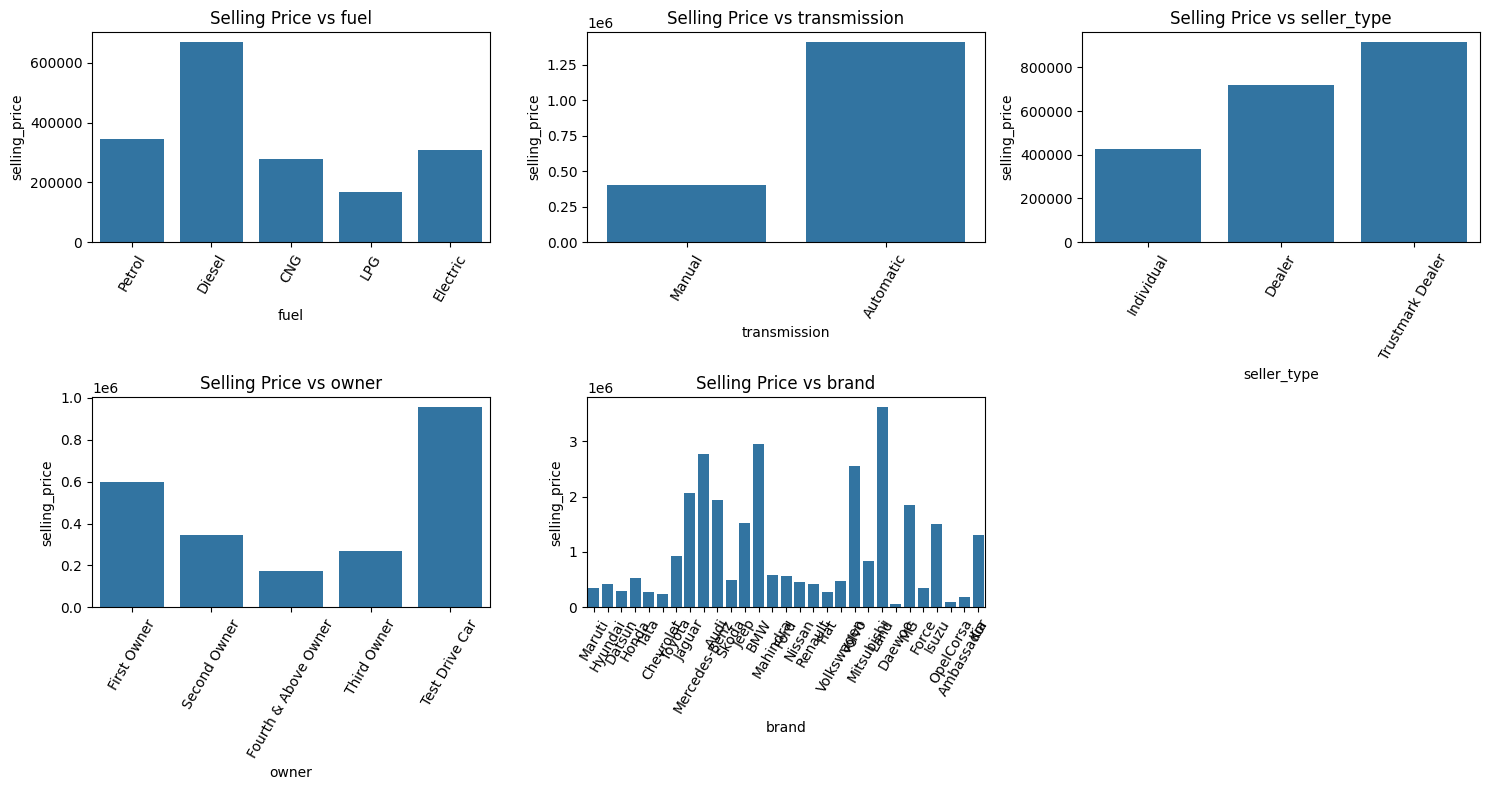

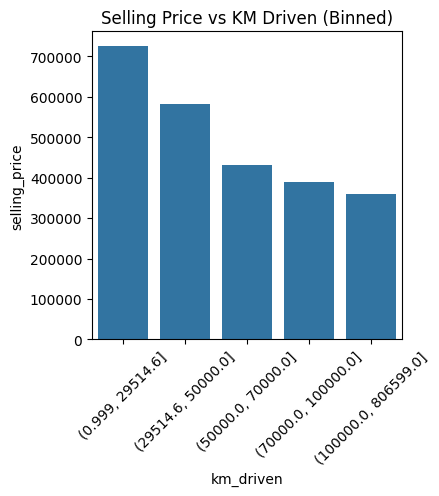

In [229]:
categorical_columns = ['fuel', 'transmission', 'seller_type', 'owner', 'brand']
plt.figure(figsize=(15, 8))

# barplots for categorical features
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange subplots in 2 rows, 3 columns
    sns.barplot(x=column, y='selling_price', data=df, estimator=lambda x: x.mean(), errorbar=None)
    plt.xticks(rotation=60)
    plt.title(f'Selling Price vs {column}')

plt.tight_layout()
plt.show()

# Barplot for km_driven (binned for better readability)
plt.figure(figsize=(4,4))
sns.barplot(x=pd.qcut(df['km_driven'], q=5), y=df['selling_price'], errorbar=None)
plt.xticks(rotation=45)
plt.title('Selling Price vs KM Driven (Binned)')
plt.show()
